In [2]:
import sys
import pandas as pd
from time import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.random_projection import johnson_lindenstrauss_min_dim
from sklearn.random_projection import SparseRandomProjection
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.utils.fixes import parse_version
from sklearn.preprocessing import MinMaxScaler
from pca import pca

In [3]:
data = 'data/heart.csv'
df = pd.read_csv(data)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df=df.drop(['target'], axis = 1)

In [ ]:
#scaler = MinMaxScaler()
#df[['age', 'sex', 'cp', 'trestbps', 'chol','fbs', 'restecg','thalach', 'exang', 'oldpeak', 'slope','ca','thal']] = scaler.fit_transform(df[['age', 'sex', 'cp', 'trestbps', 'chol','fbs', 'restecg','thalach', 'exang', 'oldpeak', 'slope','ca','thal']])

Embedding 303 samples with dim 13 using various random projections
Projected 303 samples from 13 to 1 in 0.004s
Random matrix with size: 0.000MB
Mean distances rate: 0.00 (0.01)
Projected 303 samples from 13 to 3 in 0.003s
Random matrix with size: 0.000MB
Mean distances rate: 1.29 (0.99)
Projected 303 samples from 13 to 5 in 0.003s
Random matrix with size: 0.000MB
Mean distances rate: 1.62 (0.55)
Projected 303 samples from 13 to 7 in 0.002s
Random matrix with size: 0.000MB
Mean distances rate: 1.33 (0.24)
Projected 303 samples from 13 to 9 in 0.004s
Random matrix with size: 0.000MB
Mean distances rate: 0.90 (0.40)
Projected 303 samples from 13 to 11 in 0.003s
Random matrix with size: 0.001MB
Mean distances rate: 1.35 (0.46)


<Figure size 432x288 with 0 Axes>

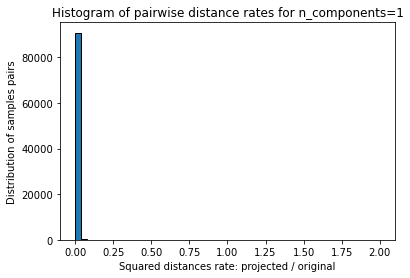

<Figure size 432x288 with 0 Axes>

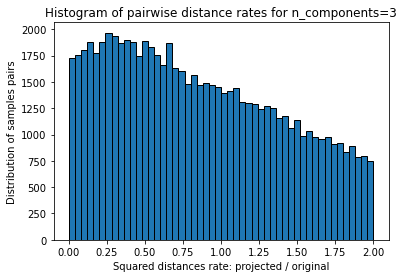

<Figure size 432x288 with 0 Axes>

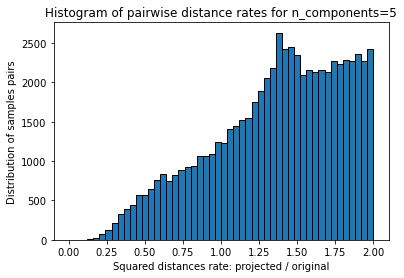

<Figure size 432x288 with 0 Axes>

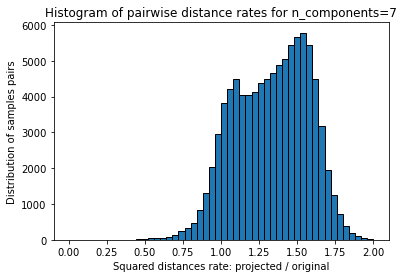

<Figure size 432x288 with 0 Axes>

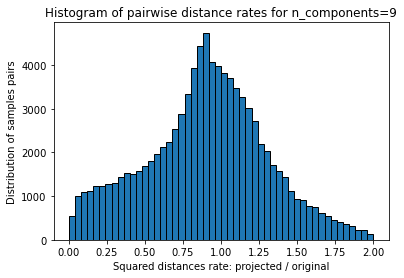

<Figure size 432x288 with 0 Axes>

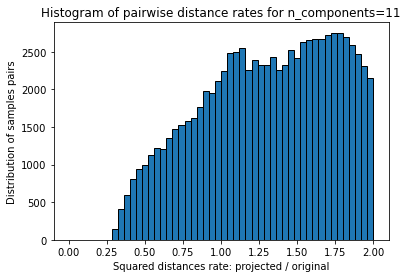

In [6]:
n_samples, n_features = df.shape
print(
    "Embedding %d samples with dim %d using various random projections"
    % (n_samples, n_features)
)

n_components_range = np.array([1,3,5,7,9,11])
dists = euclidean_distances(df, squared=True).ravel()

# select only non-identical samples pairs
nonzero = dists != 0
dists = dists[nonzero]

for n_components in n_components_range:
    t0 = time()
    rp = SparseRandomProjection(n_components=n_components)
    projected_data = rp.fit_transform(df)
    print(
        "Projected %d samples from %d to %d in %0.3fs"
        % (n_samples, n_features, n_components, time() - t0)
    )
    if hasattr(rp, "components_"):
        n_bytes = rp.components_.data.nbytes
        n_bytes += rp.components_.indices.nbytes
        print("Random matrix with size: %0.3fMB" % (n_bytes / 1e6))

    projected_dists = euclidean_distances(projected_data, squared=True).ravel()[nonzero]

    plt.figure()
    min_dist = min(projected_dists.min(), dists.min())
    max_dist = max(projected_dists.max(), dists.max())


    rates = projected_dists / dists
    print("Mean distances rate: %0.2f (%0.2f)" % (np.mean(rates), np.std(rates)))

    plt.figure()
    plt.hist(rates, bins=50, range=(0.0, 2.0), edgecolor="k")
    plt.xlabel("Squared distances rate: projected / original")
    plt.ylabel("Distribution of samples pairs")
    plt.title("Histogram of pairwise distance rates for n_components=%d" % n_components)

    # TODO: compute the expected value of eps and add them to the previous plot
    # as vertical lines / region

plt.show()


### n_components = 9

In [8]:
data_2 = 'data/penguins.csv'
df_2 = pd.read_csv(data_2)
df_2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [9]:
df_2['sex'].fillna('female')

0        male
1      female
2      female
3      female
4      female
        ...  
339      male
340    female
341      male
342      male
343    female
Name: sex, Length: 344, dtype: object

In [10]:
df_2['sex'] = df_2['sex'].fillna('female')

In [11]:
df_2

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


In [12]:

df_2["bill_length_mm"] = df_2["bill_length_mm"].fillna(value = df_2["bill_length_mm"].mean())
df_2["bill_depth_mm"] = df_2["bill_depth_mm"].fillna(value = df_2["bill_depth_mm"].mean())
df_2["flipper_length_mm"] = df_2["flipper_length_mm"].fillna(value = df_2["flipper_length_mm"].mean())
df_2["body_mass_g"] = df_2["body_mass_g"].fillna(value = df_2["body_mass_g"].mean())
df_2.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [13]:
df_2

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,female
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.80000,19.80000,207.000000,4000.000000,male
340,Chinstrap,Dream,43.50000,18.10000,202.000000,3400.000000,female
341,Chinstrap,Dream,49.60000,18.20000,193.000000,3775.000000,male
342,Chinstrap,Dream,50.80000,19.00000,210.000000,4100.000000,male


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
class_le = LabelEncoder()

In [16]:
df_2['species'] = class_le.fit_transform(df_2['species'].values)

In [17]:
df_2

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.10000,18.70000,181.000000,3750.000000,male
1,0,Torgersen,39.50000,17.40000,186.000000,3800.000000,female
2,0,Torgersen,40.30000,18.00000,195.000000,3250.000000,female
3,0,Torgersen,43.92193,17.15117,200.915205,4201.754386,female
4,0,Torgersen,36.70000,19.30000,193.000000,3450.000000,female
...,...,...,...,...,...,...,...
339,1,Dream,55.80000,19.80000,207.000000,4000.000000,male
340,1,Dream,43.50000,18.10000,202.000000,3400.000000,female
341,1,Dream,49.60000,18.20000,193.000000,3775.000000,male
342,1,Dream,50.80000,19.00000,210.000000,4100.000000,male


In [18]:
df_2 = pd.get_dummies(df_2,prefix=['island'], columns = ['island'], drop_first=True)

In [19]:
df_2 = pd.get_dummies(df_2,prefix=['sex'], columns = ['sex'], drop_first=True)
df_2

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_male
0,0,39.10000,18.70000,181.000000,3750.000000,0,1,1
1,0,39.50000,17.40000,186.000000,3800.000000,0,1,0
2,0,40.30000,18.00000,195.000000,3250.000000,0,1,0
3,0,43.92193,17.15117,200.915205,4201.754386,0,1,0
4,0,36.70000,19.30000,193.000000,3450.000000,0,1,0
...,...,...,...,...,...,...,...,...
339,1,55.80000,19.80000,207.000000,4000.000000,1,0,1
340,1,43.50000,18.10000,202.000000,3400.000000,1,0,0
341,1,49.60000,18.20000,193.000000,3775.000000,1,0,1
342,1,50.80000,19.00000,210.000000,4100.000000,1,0,1


In [21]:
df_2 = df_2.drop(['species'], axis = 1)

Embedding 344 samples with dim 7 using various random projections
Projected 344 samples from 7 to 2 in 0.004s
Random matrix with size: 0.000MB
Mean distances rate: 0.04 (0.27)
Projected 344 samples from 7 to 3 in 0.003s
Random matrix with size: 0.000MB
Mean distances rate: 0.89 (0.07)
Projected 344 samples from 7 to 4 in 0.002s
Random matrix with size: 0.000MB
Mean distances rate: 1.33 (0.11)
Projected 344 samples from 7 to 5 in 0.002s
Random matrix with size: 0.000MB
Mean distances rate: 0.53 (0.07)
Projected 344 samples from 7 to 6 in 0.002s
Random matrix with size: 0.000MB
Mean distances rate: 1.31 (0.08)
Projected 344 samples from 7 to 7 in 0.004s
Random matrix with size: 0.000MB
Mean distances rate: 0.76 (0.04)


<Figure size 432x288 with 0 Axes>

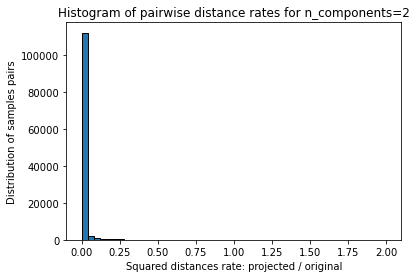

<Figure size 432x288 with 0 Axes>

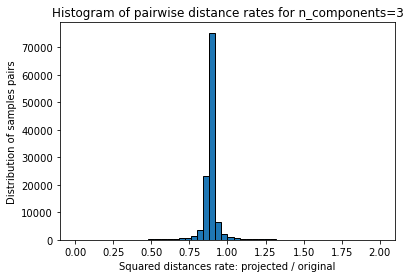

<Figure size 432x288 with 0 Axes>

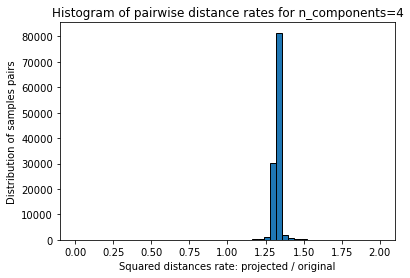

<Figure size 432x288 with 0 Axes>

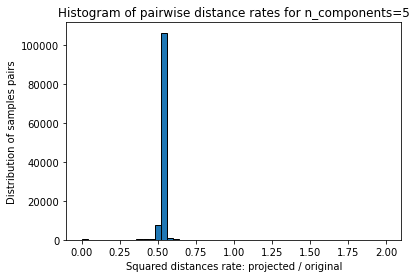

<Figure size 432x288 with 0 Axes>

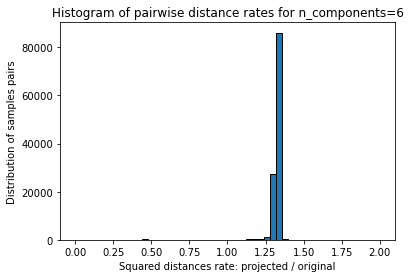

<Figure size 432x288 with 0 Axes>

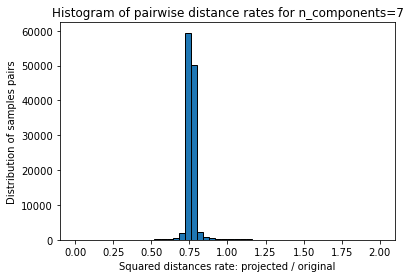

In [22]:
n_samples, n_features = df_2.shape
print(
    "Embedding %d samples with dim %d using various random projections"
    % (n_samples, n_features)
)

n_components_range = np.array([2,3,4,5,6,7])
dists = euclidean_distances(df_2, squared=True).ravel()

# select only non-identical samples pairs
nonzero = dists != 0
dists = dists[nonzero]

for n_components in n_components_range:
    t0 = time()
    rp = SparseRandomProjection(n_components=n_components)
    projected_data = rp.fit_transform(df_2)
    print(
        "Projected %d samples from %d to %d in %0.3fs"
        % (n_samples, n_features, n_components, time() - t0)
    )
    if hasattr(rp, "components_"):
        n_bytes = rp.components_.data.nbytes
        n_bytes += rp.components_.indices.nbytes
        print("Random matrix with size: %0.3fMB" % (n_bytes / 1e6))

    projected_dists = euclidean_distances(projected_data, squared=True).ravel()[nonzero]

    plt.figure()
    min_dist = min(projected_dists.min(), dists.min())
    max_dist = max(projected_dists.max(), dists.max())


    rates = projected_dists / dists
    print("Mean distances rate: %0.2f (%0.2f)" % (np.mean(rates), np.std(rates)))

    plt.figure()
    plt.hist(rates, bins=50, range=(0.0, 2.0), edgecolor="k")
    plt.xlabel("Squared distances rate: projected / original")
    plt.ylabel("Distribution of samples pairs")
    plt.title("Histogram of pairwise distance rates for n_components=%d" % n_components)

    # TODO: compute the expected value of eps and add them to the previous plot
    # as vertical lines / region

plt.show()


### n_components = 4